Naoki Atkins

Project 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
np.set_printoptions(suppress=True)

***Question 1***

In [2]:
data = np.load('./boston.npz')

***Question 2***

In [3]:
features = data['features']
target = data['target']

X = features
y = target[:,None]

In [4]:
X = np.concatenate((np.ones((len(X),1)),X),axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=(2021-3-11))

***Question 3***

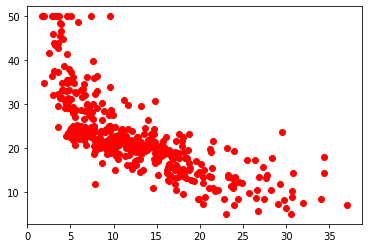

In [6]:
plt.plot(X_train[:,13], y_train, 'ro')

The relationship seems to follow more of a negative quadratic than a linear line.

***Question 4***

In [7]:
LSTAT = X_train[:,13][:,None]
MEDV = y_train

In [8]:
reg = LinearRegression().fit(LSTAT, MEDV)

In [9]:
reg.coef_

array([[-0.98093888]])

In [10]:
reg.intercept_

array([34.99113302])

MEDV = 34.991133021969475 + (-0.98093888)(LSTAT)

***Question 5***

In [11]:
abline = np.array([reg.intercept_, reg.coef_], dtype=object)

In [12]:
testx = np.linspace(0,40,100)[:,None]
testX = np.hstack((np.ones_like(testx),testx))
testt = np.dot(testX,abline)

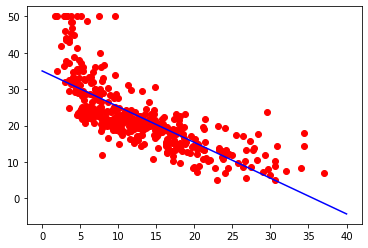

In [13]:
plt.figure()
plt.plot(LSTAT,MEDV,'ro')
plt.plot(testx,testt,'b')

The model fits decently well along the center of the mass of data. Around the extremes, the line is a little bit off.

***Question 6***

In [14]:
pred = reg.predict(LSTAT)

In [15]:
mean_squared_error(y_train, pred)

38.47893344802523

Average Loss = 38.47893344802523

***Question 7***

In [16]:
pred_test = reg.predict(X_test[:,13][:,None])

In [17]:
mean_squared_error(y_test, pred_test)

38.75054664279498

Test MSE is slightly higher...

***Question 8***

In [18]:
LSTAT_sqr = np.hstack((np.ones_like(LSTAT), LSTAT, LSTAT**2))

In [19]:
reg = LinearRegression().fit(LSTAT_sqr, MEDV)

In [20]:
pred_train_LSTAT_sqr = reg.predict(LSTAT_sqr)

In [21]:
MSE_train_sqr = mean_squared_error(y_train, pred_train_LSTAT_sqr)

In [22]:
MSE_train_sqr

30.59851434937097

In [23]:
LSTAT_sqr_test = np.hstack((np.ones_like(X_test[:,13][:,None]), X_test[:,13][:,None], X_test[:,13][:,None]**2))

In [24]:
pred_test_LSTAT_sqr = reg.predict(LSTAT_sqr_test)

In [25]:
MSE_test_sqr = mean_squared_error(y_test, pred_test_LSTAT_sqr)

In [26]:
MSE_test_sqr

29.297124138279123

How do the training and test MSE values for this model compare to the previous model?

***Question 9***

In [27]:
reg.coef_

array([[ 0.        , -2.365919  ,  0.04440767]])

In [28]:
reg.intercept_

array([43.07121508])

In [29]:
squared_line = [reg.intercept_, reg.coef_[0][1], reg.coef_[0][2]]

In [30]:
testx = np.linspace(0,40,100)[:,None]
testX = np.hstack((np.ones_like(testx),testx, testx**2))
testt = np.dot(testX,squared_line)

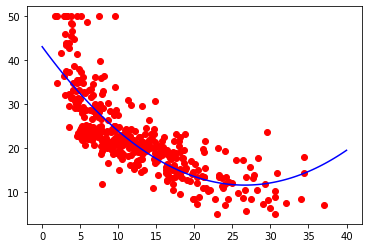

In [31]:
plt.figure()
plt.plot(LSTAT,MEDV,'ro')
plt.plot(testx,testt,'b')

Model fits pretty well. Better than the line.

***Question 10***

In [32]:
reg = LinearRegression().fit(X_train, y_train)

In [33]:
reg.coef_

array([[  0.        ,  -0.11972196,   0.05296359,   0.05161503,
          2.55847703, -17.25240202,   4.08697043,  -0.00464415,
         -1.52421308,   0.29963832,  -0.01371524,  -0.84891262,
          0.00656971,  -0.53327603]])

In [34]:
reg.intercept_

array([34.33727849])

In [35]:
pred = reg.predict(X_train)

In [36]:
mean_squared_error(y_train, pred)

21.046340805342368

The above mean square error is for the training set

In [37]:
pred_test = reg.predict(X_test)

In [38]:
mean_squared_error(y_test, pred_test)

25.976408935996474

How do the training and test MSEs for this model (which is a linear model including all features) compare to the values you found for experiment (8) (which was a degree-2 polynomial model including a single feature)? What accounts for the difference?

Ans: It fits better. Making the model more complex allows it to fit the data more flexibly. This causes the MSE to go lower. 

**Incomplete work down below**

***Question 11***

In [39]:
new_x_train = np.hstack((X_train, X_train**2))

In [40]:
reg = LinearRegression().fit(new_x_train, MEDV)

In [41]:
pred = reg.predict(new_x_train)

In [42]:
mean_squared_error(y_train, pred)

13.508100802461705

In [43]:
new_x_test = np.hstack((X_test, X_test**2))

In [44]:
reg = LinearRegression().fit(new_x_test, y_test)

In [45]:
pred = reg.predict(new_x_test)

In [46]:
mean_squared_error(y_test, pred)

12.689329023179038

^ Not finished

***Question 12***

In [47]:
poly = PolynomialFeatures(degree=3)

In [48]:
x_poly = poly.fit_transform(X_train)

In [49]:
poly.fit(X_train, y_train)

PolynomialFeatures(degree=3)

In [50]:
reg.fit(x_poly, y_train)

LinearRegression()

In [51]:
y_pred = reg.predict(poly.fit_transform(X_train))

In [52]:
mean_squared_error(y_pred, y_train)

9.63138206794404e-16

In [53]:
x_poly = poly.fit_transform(X_test)

In [54]:
poly.fit(X_test, y_test)

PolynomialFeatures(degree=3)

In [55]:
reg.fit(x_poly, y_test)

LinearRegression()

In [56]:
y_pred = reg.predict(poly.fit_transform(X_test))

In [57]:
mean_squared_error(y_test, pred)

12.689329023179038

***Question 11***

In [58]:
new_x_train = np.hstack((X_train, X_train**2))

In [59]:
reg = LinearRegression().fit(new_x_train, y_train)

In [60]:
pred = reg.predict(new_x_train)

In [61]:
mean_squared_error(y_train, pred)

13.508100802461705

In [62]:
new_x_test = np.hstack((X_test, X_test**2))

In [63]:
reg = LinearRegression().fit(new_x_test, y_test)

In [64]:
pred = reg.predict(new_x_test)

In [65]:
mean_squared_error(y_test, pred)

12.689329023179038

***Question 12***

In [66]:
poly = PolynomialFeatures(degree=3, interaction_only=True)

In [67]:
x_poly = poly.fit_transform(X_train)

In [68]:
poly.fit(X_train, y_train)

PolynomialFeatures(degree=3, interaction_only=True)

In [69]:
reg = LinearRegression().fit(x_poly, y_train)

In [70]:
y_pred = reg.predict(poly.fit_transform(X_train))

In [71]:
mean_squared_error(y_train, y_pred)

1.0820262458760754